이번 과제는 **KNN 알고리즘**과 **K-Means 알고리즘**을 활용하여 데이터를 분석하는 것입니다.

과제는 두 가지 파트로 나누어져 있습니다:

#### 1. KNN 알고리즘 구현 및 분석
- 주어진 데이터셋을 로드한 후, 전처리와 EDA을 수행하세요.
  - [데이터 다운받기 : diabetes](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)
- KNN 알고리즘을 구현하고, 하이퍼파라미터 튜닝을 통해 최적의 성능을 내는 모델을 구축해 보세요.
  - 다양한 distance metric을 사용해보세요.
- 모델의 성능을 평가한 뒤, 다양한 지표를 사용해 결과를 해석하세요.
- 추가적으로 Weighted KNN과 같은 변형된 알고리즘도 적용해 보세요 :)

#### 2. K-Means 알고리즘 구현 및 분석
- 주어진 데이터셋을 로드한 후, 전처리와 EDA을 수행하세요.
  - [데이터 다운받기 : Facebook Live sellers](https://www.kaggle.com/datasets/ashishg21/facebook-live-sellers-in-thailand-uci-ml-repo)
- K-Means 알고리즘을 사용해 clustering을 수행하세요.
  - 다양한 cluster 개수를 가지고 실험해 보세요.
- clustering 결과를 시각화하고, Elbow Method나 Silhouette Score 등을 활용해 clustering의 성능을 평가하세요.
- 추가적으로 K-Means++를 사용해 clustering을 진행해 보세요 :)



---

In [77]:
# 본인이 필요한 라이브러리 추가

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')


# 1. KNN 과제

## 1. 데이터 로드

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
# 본인 데이터 저장 경로에 맞춰 수정하기

df = pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [27]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 2. 데이터 전처리/EDA


In [28]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [29]:
#이상치제거

col = list(df.columns)
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[col]<(Q1-1.5*IQR)) | (df[col]>(Q3+1.5*IQR))).any(axis=1)]

In [33]:
#정규화

x = df.iloc[:,:8]
y = df.iloc[:,8]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.fit_transform(x_test)

## 3. KNN 구현 & 파라미터 튜닝


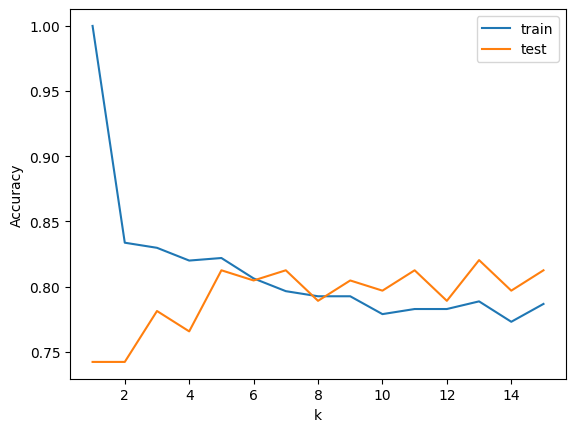

In [38]:
train_accuracy =[]; test_accuracy = []
neighbors = range(1,16)

for k in neighbors:
  knn = KNeighborsClassifier(n_neighbors = k,p = 2, metric = 'minkowski') #유클리드거리
  knn.fit(x_train_std, y_train)
  score = knn.score(x_train_std, y_train)
  train_accuracy.append(score)
  score = knn.score(x_test_std, y_test)
  test_accuracy.append(score)

plt.plot(neighbors, train_accuracy, label = 'train')
plt.plot(neighbors, test_accuracy, label = 'test')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

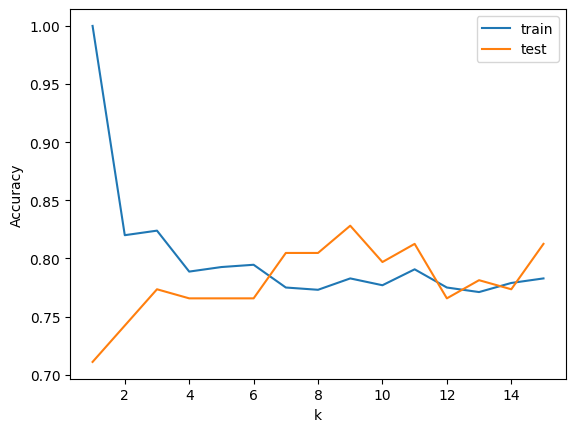

In [39]:
train_accuracy =[]; test_accuracy = []
neighbors = range(1,16)

for k in neighbors:
  knn = KNeighborsClassifier(n_neighbors = k, p = 1, metric = 'minkowski')  #맨하튼거리
  knn.fit(x_train_std, y_train)
  score = knn.score(x_train_std, y_train)
  train_accuracy.append(score)
  score = knn.score(x_test_std, y_test)
  test_accuracy.append(score)

plt.plot(neighbors, train_accuracy, label = 'train')
plt.plot(neighbors, test_accuracy, label = 'test')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [40]:
k = 9
knn = KNeighborsClassifier(n_neighbors = k, p = 1, metric = 'minkowski')  #맨하튼거리

knn.fit(x_train_std, y_train)

KNeighborsClassifier(n_neighbors=9, p=1)

## 4. 평가

In [41]:
y_pred = knn.predict(x_test_std)
accuracy_score(y_test, y_pred)

0.828125

---
# 2. K-Means 과제

## 1. 데이터 로드

In [52]:
# 본인 데이터 저장 경로에 맞춰 수정하기

df = pd.read_csv("/content/Live.csv")
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


## 2. 데이터 전처리/EDA

In [54]:
#범주형->수치형
le = LabelEncoder()
df['status_type'] = le.fit_transform(df['status_type'])

#변수선택
drop_col = ['status_id', 'status_published', 'Column1', 'Column2', 'Column3', 'Column4']
df = df.drop(columns = drop_col, axis = 1)

In [55]:
#이상치제거
col = list(df.columns)
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[col]<(Q1-1.5*IQR)) | (df[col]>(Q3+1.5*IQR))).any(axis=1)]

In [57]:
#표준화
scaler = StandardScaler()
scaler.fit(df)
df_std = scaler.transform(df)
print(df_std)

[[-0.55284393  1.40357969 -0.55599357 ...  0.          0.
   0.        ]
 [-0.55284393  0.86592605 -0.55599357 ...  0.          0.
   0.        ]
 [-0.55284393  2.13423719 -0.4061856  ...  0.          0.
   0.        ]
 ...
 [-0.55284393  0.56263426 -0.55599357 ...  0.          0.
   0.        ]
 [-0.55284393 -0.63674692 -0.55599357 ...  0.          0.
   0.        ]
 [-0.55284393 -0.42995706 -0.55599357 ...  0.          0.
   0.        ]]


## 3. K-Means 구현 & 파라미터 튜닝

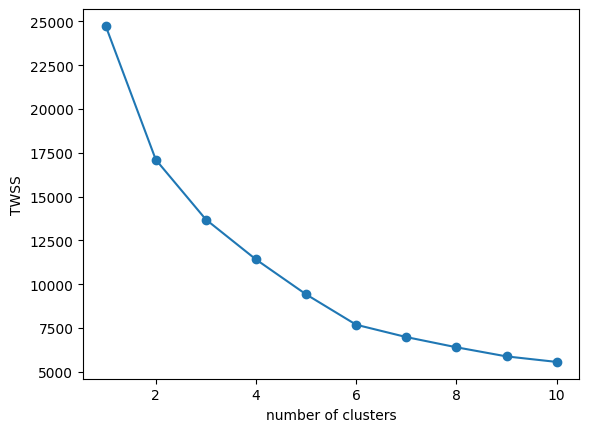

In [60]:
TWSS = {}
for k in range(1,11):
  model = KMeans(n_clusters = k)
  model.fit(df_std)
  TWSS[k] = model.inertia_

plt.plot(list(TWSS.keys()), list(TWSS.values()), marker = 'o')
plt.xlabel('number of clusters')
plt.ylabel('TWSS')
plt.show()

In [96]:
K = 3
kmeans = KMeans(n_clusters = K)
kmeans.fit(df_std)
df['cluster'] = kmeans.labels_

## 4. 평가

In [97]:
#실루엣점수

score_samples = silhouette_samples(df_std, df['cluster'])
df['silhouette_coeff'] = score_samples

print(np.mean(score_samples))
print(silhouette_score(df_std, df['cluster']))

0.4730116355956397
0.4730116355956397


In [98]:
#군집별 실루엣 스코어

df.groupby('cluster')['silhouette_coeff'].mean()

,silhouette_coeff
cluster,
0,0.496111
1,0.529987
2,0.064182
